# Convolutional Neural Network

![alt text](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/10/59954intro-to-CNN.webp)

[CNN Explainer](https://poloclub.github.io/cnn-explainer/)

## what really happens!
![alt text](https://images.javatpoint.com/tutorial/tensorflow/images/mnist-dataset-in-cnn3.png)

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
#Convert MMIST data to tensor of 4d (batch_size, channel, height, width)
transform = transforms.ToTensor()

In [28]:
#train data
train_data = datasets.MNIST(root='cnn_data', train=True, download=True, transform=transform)

In [29]:
#test data
test_data = datasets.MNIST(root='cnn_data', train=False, download=True, transform=transform)

In [30]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [31]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [32]:
# Create a small batch size for images 
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [33]:
#ddefine the convolutional neural network model
#2 convolutional layers and 2 fully connected layers
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [34]:
for i, (X_train, y_train) in enumerate(train_data):
    break

In [35]:
X_train.shape

torch.Size([1, 28, 28])

In [36]:
x = X_train.view(1,1,28,28)

In [37]:
# perform our first convolution, followed by a ReLU activation
x = F.relu(conv1(x))


In [38]:
x.shape

torch.Size([1, 6, 26, 26])

In [39]:
#pass through the max pooling layer
x = F.max_pool2d(x, 2, 2)

In [40]:
x.shape

torch.Size([1, 6, 13, 13])

In [41]:
#2nd convolutional layer
x = F.relu(conv2(x))

In [42]:
x.shape

torch.Size([1, 16, 11, 11])

In [43]:
#pooling layer
x = F.max_pool2d(x, 2, 2)

In [44]:
x.shape 

torch.Size([1, 16, 5, 5])

In [49]:
#Model Class
class CNN_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        #fully connected layers
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, X):
        #first convolutional layer
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2) # 2x2 kernel size and stride of 2
        #second convolutional layer
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)  # 2x2 kernel size and stride of 2
        #flatten the data
        X = X.view(-1, 5*5*16)
        #fully connected layers
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [50]:
torch.manual_seed(42)
model = CNN_model()
model

CNN_model(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [51]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [53]:
import time
start_time = time.time()

#create Variable to track things 
epocs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#for loop of epochs
for i in range(epocs):
    trn_corr = 0
    tst_corr = 0

    #train
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        
        predicted = torch.max(y_pred.data, 1)[1] #add up the number of correct predictions. Indexed off the first point
        batch_corr = (predicted == y_train).sum() #how many we got correct in the batch
        trn_corr += batch_corr
    
        #Update our parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #print out result
        if b%600 == 0:
            print(f'Epoch {i} Batch: {b} LOSS: {loss.item()}')
    
    train_losses.append(loss)
    train_correct.append(trn_corr)
    
    #test
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()
            
    loss_val = loss_fn(y_val, y_test)
    test_losses.append(loss_val)
    test_correct.append(tst_corr)

end_time = time.time()
print(f"Elapsed time: {(end_time - start_time)/60} mins")

Epoch 0 Batch: 600 LOSS: 0.00014297242159955204
Epoch 0 Batch: 1200 LOSS: 0.10018302500247955
Epoch 0 Batch: 1800 LOSS: 0.13084593415260315
Epoch 0 Batch: 2400 LOSS: 3.990810364484787e-05
Epoch 0 Batch: 3000 LOSS: 5.35858198418282e-05
Epoch 0 Batch: 3600 LOSS: 6.658110214630142e-05
Epoch 0 Batch: 4200 LOSS: 3.0766437703277916e-05
Epoch 0 Batch: 4800 LOSS: 0.0009871450020000339
Epoch 0 Batch: 5400 LOSS: 0.0004568469594232738
Epoch 0 Batch: 6000 LOSS: 0.00011249084491282701
Epoch 1 Batch: 600 LOSS: 0.0010965315159410238
Epoch 1 Batch: 1200 LOSS: 0.004388694651424885
Epoch 1 Batch: 1800 LOSS: 0.012165470980107784
Epoch 1 Batch: 2400 LOSS: 0.0001722902525216341
Epoch 1 Batch: 3000 LOSS: 3.1634739571018144e-05
Epoch 1 Batch: 3600 LOSS: 1.1682482181640808e-06
Epoch 1 Batch: 4200 LOSS: 0.002705313265323639
Epoch 1 Batch: 4800 LOSS: 0.007160884328186512
Epoch 1 Batch: 5400 LOSS: 0.0002007679286180064
Epoch 1 Batch: 6000 LOSS: 0.0009616588358767331
Epoch 2 Batch: 600 LOSS: 0.0001118571235565468

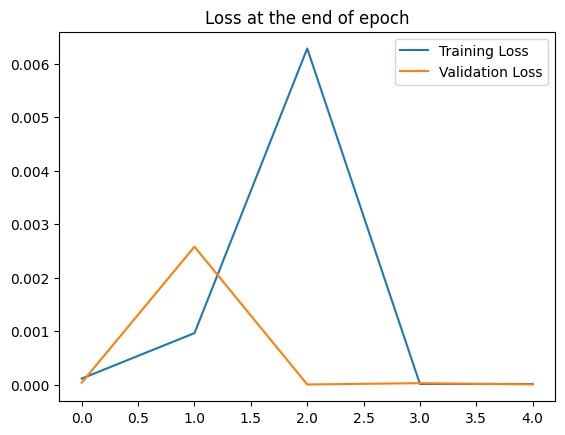

In [54]:
#graph the results
train_losses = [t1.item() for t1 in train_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Loss at the end of epoch')
plt.legend()

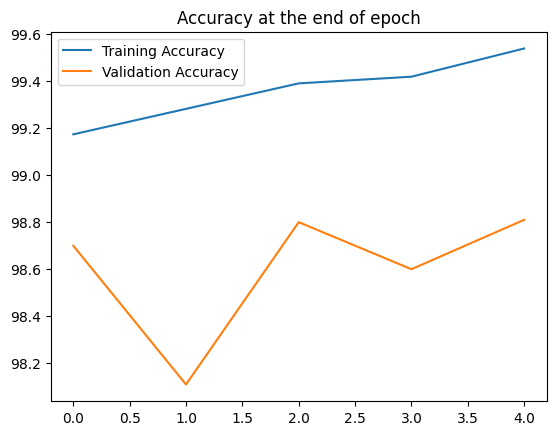

In [55]:
# accuracy
train_accuracy = [t/600 for t in train_correct]
test_accuracy = [t/100 for t in test_correct]
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Validation Accuracy')
plt.title('Accuracy at the end of epoch')
plt.legend()


In [56]:
test_load_data = DataLoader(test_data, batch_size=10000, shuffle=False)

In [57]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_data:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [59]:
correct.item()/len(test_data)*100

98.81

In [61]:
#grab a batch of test data
test_data[2278]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [63]:
# grab just data
test_data[2278][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

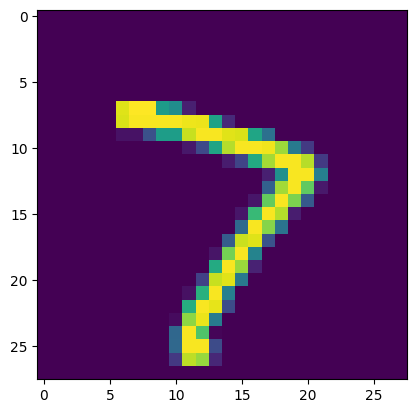

In [64]:
plt.imshow(test_data[2278][0].reshape(28,28))

In [67]:
# pass the image through the model
model.eval()
with torch.no_grad():
    new_pred = model(test_data[2278][0].view(1,1,28,28)).argmax() 
    
    #batch size 1, channel 1, height 28, width 28
    
    #argmax to get the index of the highest value

In [68]:
new_pred.item()

7